In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image

import seaborn as sns
import matplotlib.image as image

In [ ]:
dftrain,dftest=pd.read_csv(r"/content/drive/MyDrive/mnist_train.csv"),pd.read_csv(r"/content/drive/MyDrive/mnist_test.csv")

In [ ]:
dftrain.shape

(60000, 785)

In [ ]:
dftrain.iloc[:,0].value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [ ]:
xTrain,yTrain,xTest,yTest=dftrain.drop(columns="label"),dftrain['label'],dftest.drop(columns='label'),dftest['label']

In [ ]:
xTrain.shape,len(yTrain),xTest.shape,len(yTest)

((60000, 784), 60000, (10000, 784), 10000)

In [ ]:
xTrain

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=np.array([[1,2,3],
           [4,5,6],
           [7,8,9]])

In [ ]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

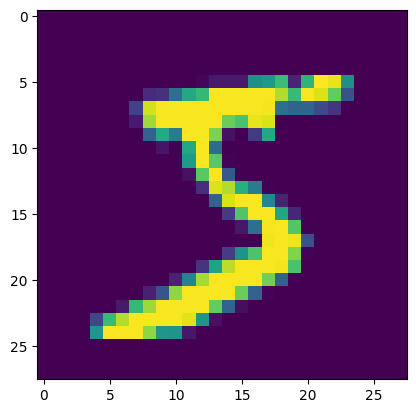

In [ ]:
plt.imshow(xTrain.iloc[0,:].values.reshape(28,28))

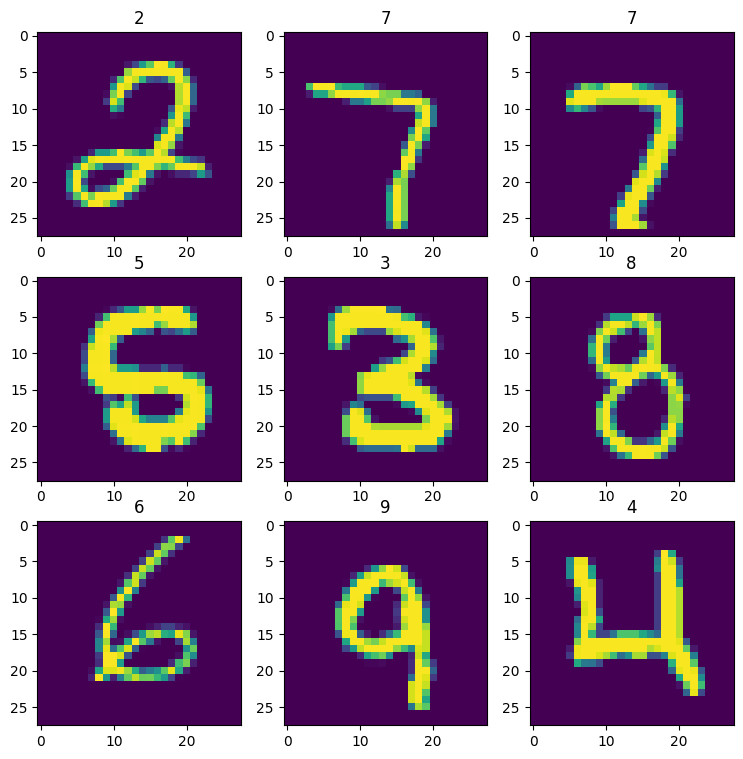

In [ ]:
trainSample=dftrain.sample(9)
trainSampleIndex=trainSample.index
plt.figure(figsize=(9,9))
for i,val in enumerate(trainSampleIndex):
    plt.subplot(3,3,i+1)
    plt.title(yTrain.iloc[val])
    plt.imshow(xTrain.iloc[val,:].values.reshape(28,28))

In [ ]:
from sklearn.svm import SVC

In [ ]:
imSVClassifier = SVC()

In [ ]:
imSVClassifier.fit(xTrain,yTrain)

SVC()

In [ ]:
yTrainpred, yTestpred = imSVClassifier.predict(xTrain), imSVClassifier.predict(xTest) # predicting the test results

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
yTestCM = confusion_matrix(yTest, yTestpred, labels = imSVClassifier.classes_)

In [ ]:
yTestCM

array([[ 973,    0,    1,    0,    0,    2,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1006,    2,    1,    0,    2,    7,    6,    1],
       [   0,    0,    2,  995,    0,    2,    0,    5,    5,    1],
       [   0,    0,    5,    0,  961,    0,    3,    0,    2,   11],
       [   2,    0,    0,    9,    0,  871,    4,    1,    4,    1],
       [   6,    2,    0,    0,    2,    3,  944,    0,    1,    0],
       [   0,    6,   11,    1,    1,    0,    0,  996,    2,   11],
       [   3,    0,    2,    6,    3,    2,    2,    3,  950,    3],
       [   3,    4,    1,    7,   10,    2,    1,    7,    4,  970]])

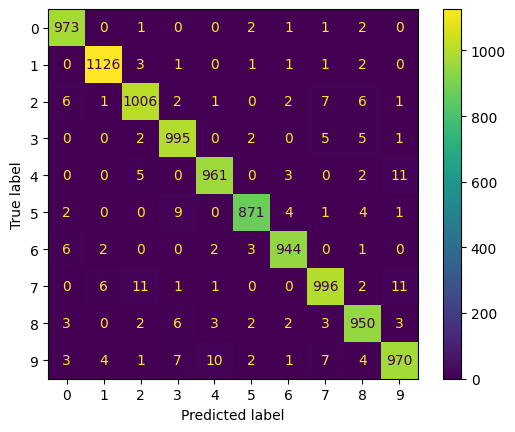

In [ ]:
cm = ConfusionMatrixDisplay(yTestCM, display_labels=imSVClassifier.classes_)
cm.plot()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
imDTClassifier = DecisionTreeClassifier()
imDTClassifier.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [ ]:
yTrainpred, yTestpred = imDTClassifier.predict(xTrain), imDTClassifier.predict(xTest)

In [ ]:
yTestCM = confusion_matrix(yTest, yTestpred, labels = imDTClassifier.classes_)

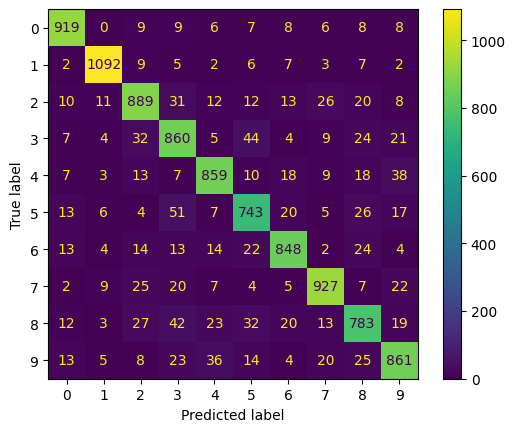

In [ ]:
cm = ConfusionMatrixDisplay(yTestCM, display_labels=imDTClassifier.classes_)
cm.plot()